In [61]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# loading data
wine=pd.read_csv('../../Desktop/wine.csv')
wine.head()

,Grade,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
wine.shape

(178, 14)

In [7]:
wine.columns

Index(['Grade', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10',
       'P11', 'P12', 'P13'],
      dtype='object')

In [8]:
wine.duplicated().sum()

0

In [9]:
wine.isnull().sum().sum()

0

In [10]:
wine['Grade'].value_counts()

2    71
1    59
3    48
Name: Grade, dtype: int64

In [11]:
x = wine.values[::, 1:14]
y = wine.values[::, 0:1]

In [12]:
# divided into testing and training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=17)

In [13]:
# Building KNeighbors classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train.ravel())

knn_pred = knn.predict(x_test)
# Checking accuracy
accuracy_score(y_test, knn_pred) 

0.61111111111111116

In [14]:
# set up the number of neighbors 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])
knn_params = {'knn__n_neighbors': range(1, 10)}

In [15]:
from sklearn.model_selection import GridSearchCV, cross_val_score

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)

knn_grid.fit(x_train, y_train)
knn_grid.best_params_, knn_grid.best_score_ 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    7.1s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


({'knn__n_neighbors': 3}, 0.95161290322580649)

In [16]:
accuracy_score(y_test, knn_grid.predict(x_test))

0.98148148148148151

In [17]:
# Building DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

tree_cl = DecisionTreeClassifier(max_depth=5, random_state=12)
tree_cl=tree_cl.fit(x_train, y_train)

tree_pred = tree_cl.predict(x_test)
accuracy_score(y_test, tree_pred) 

0.88888888888888884

In [18]:
# set up parametres of DecisionTreeClassifier model 

tree_params = {'max_depth': range(1,11), 'max_features': range(4,14)}
tree_grid = GridSearchCV(tree_cl, tree_params, cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=12,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(1, 11), 'max_features': range(4, 14)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [19]:
tree_grid.best_params_

{'max_depth': 3, 'max_features': 8}

In [20]:
# estimation of the accuracy (training data)
tree_grid.best_score_ 

0.94354838709677424

In [30]:
accuracy_score(y_test, tree_grid.predict(x_test))# estimation of the accuracy (testing data)

0.90740740740740744

In [42]:
# Bulding RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators = 5, max_depth = 2, random_state = 1)
rf.fit(x_train, y_train.ravel())

rf_pred = rf.predict(x_test)
# Checking accuracy
accuracy_score(y_test, rf_pred) 

0.96296296296296291

In [39]:
# set up parametres of RandomForestClassifier model 
forest_params = {'max_depth': range(1,11),'max_features': range(4,14)}
forest_grid = GridSearchCV(rf, forest_params, cv=5, n_jobs=-1, verbose=True)

forest_grid.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 485 out of 500 | elapsed:    8.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    8.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(1, 11), 'max_features': range(4, 14)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [ ]:
forest_grid.best_params_, forest_grid.best_score_

In [ ]:
#estimation depending on number training data
from sklearn import learning_curve

train_sizes, train_scores, test_scores = learning_curve.learning_curve(rf,wine.iloc[:,1:],wine.Grade.values,
                                                                      train_sizes=np.arange(0.1,1, 0.2),
                                                                      cv=3, scoring='accuracy')

In [85]:
print (train_sizes)
print (train_scores.mean(axis = 1))
print (test_scores.mean(axis = 1))

[ 11  35  59  82 106]
[ 1.          1.          0.98305085  0.99593496  0.96855346]
[ 0.33141762  0.33141762  0.67452107  0.67988506  0.86628352]


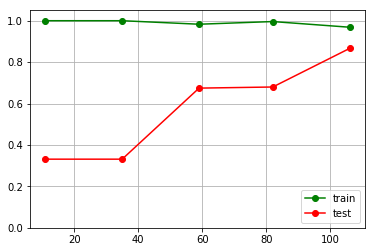

In [86]:
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0,1.05))
pylab.legend(loc='lower right')

In [ ]:
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def add(test):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test)
    x_train_draw = scale(x_train[::, 0:2])
    x_test_draw = scale(x_test[::, 0:2])
    rf.fit(x_train_draw, y_train.ravel())
    x_min, x_max = x_train_draw[:, 0].min() - 1, x_train_draw[:, 0].max() + 1
    y_min, y_max = x_train_draw[:, 1].min() - 1, x_train_draw[:, 1].max() + 1
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
            np.arange(y_min, y_max, h))
    pred = rf.predict(np.c_[xx.ravel(), yy.ravel()])
    pred = pred.reshape(xx.shape)
    
    plt.figure()
    plt.pcolormesh(xx, yy, pred, cmap=cmap_light)
    plt.scatter(x_train_draw[:, 0], x_train_draw[:, 1], 
            c=y_train[:, 0], cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Score: %.0f percents" % (rf.score(x_test_draw, y_test) * 100))
    return plt.show()

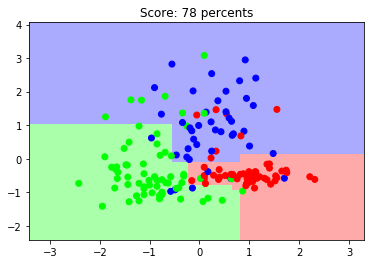

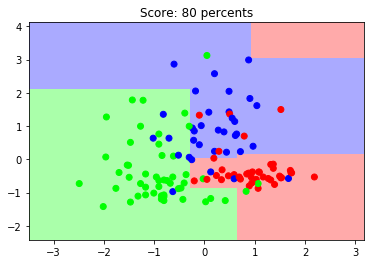

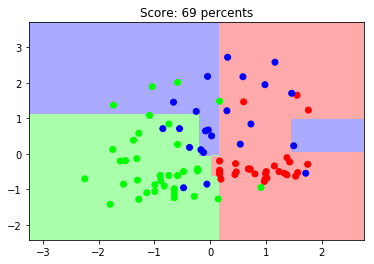

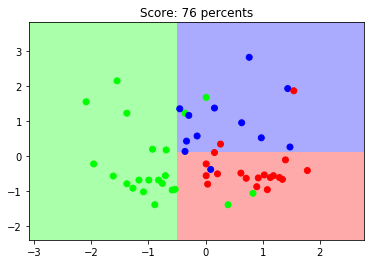

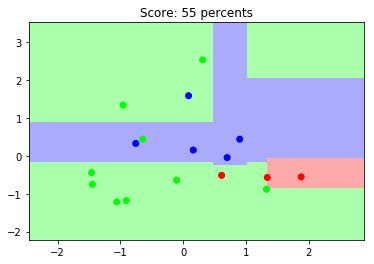

[None, None, None, None, None]

In [170]:
[add(i) for i in np.arange(0.1, 1, 0.2)]